In [ ]:
from IPython.display import YouTubeVideo, Markdown, SVG
from functools import partial
YouTubeVideo_formato = partial(YouTubeVideo, modestbranding=1, disablekb=0,
                               width=640, height=360, autoplay=0, rel=0, showinfo=0)

display(Markdown(filename='../../preamble.md'))

In [ ]:
#%autosave 0
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pandas as pd

Luego de aplicar las herramientas de estadísticas descriptiva para entender mejor nuestros datos podemos enfocarnos en

# Inferencia estadística

La inferencia busca

> Extraer **conclusiones** a partir de **hechos** a través de un **método o premisa**

En el caso particular de la **inferencia estadística** tenemos que

- Hechos: Datos
- Premisa: Modelo probabilístico
- Conclusión: Una cantidad no observada que es interesante

Y lo que buscamos es

> Cuantificar la incerteza de la conclusión dado los datos y el modelo 

La inferencia estadística puede dividirse en los siguientes tres niveles
1. Ajustar un modelo a nuestros datos
1. Verificar que el modelo sea confiable
1. Responder una pregunta usando el modelo

A continuación estudiaremos herramientas asociadas a cada nivel
1. **Estimador de máxima verosimilitud**
1. **Bondad de ajuste** e **Intervalos de confianza**
1. **Test de hipótesis**

## Ajuste de modelos 

En este nivel de inferencia se busca ajustar un modelo teórico sobre nuestros datos

Nosotros nos enfocaremos en **modelos de tipo parámetrico**

Un modelo parámetrico es aquel donde **se explicita una distribución de probabilidad**

Por ejemplo ajustar una distribución Gaussiana a mis datos

Recordemos que **una distribución tiene parámetros**

Por ejemplo la distribución Gaussiana univariada se describe por su media $\mu$ y su varianza $\sigma^2$

Entonces ajustar una distribución Gaussiano corresponde a

> encontrar el mejor valor de $\mu$ y $\sigma$ dado los datos

### ¿Qué distribución ajustar?

Antes de ajustar debemos suponer una distribución para nuestro modelo

En general podemos ajustar cualquier distribución pero 

> Un mal supuesto podría invalidar nuestra inferencia

Podemos usar las herramientas de estadística descriptiva para estudiar nuestros datos y tomar esta decisión de manera informada

En el siguiente ejemplo, un histograma revela que una modelo gaussiano no es una buena decisión 

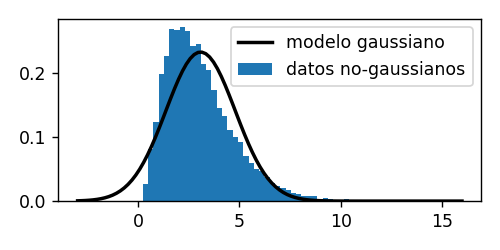

Considerando las características de la Gaussiana ¿Por qué no es apropiada en este caso?



### ¿Cómo ajustar mi modelo? Estimación de máxima verosimilitud

A continuación describiremos un procedimiento para ajustar modelos paramétricos llamado *maximum likelihood estimation* (MLE)

Sea un conjunto de datos $\{x_1, x_2, \ldots, x_N\}$

**Supuesto 1** Los datos siguen el modelo $f(x;\theta)$ donde $f(\cdot)$ es una distribución y $\theta$ son sus parámetros

$$
f(x_1, x_2, \ldots, x_N |\theta)
$$

**Supuesto 2** Las observaciones son independientes e idénticamente distribuidas (iid)

- Si dos variables son independientes se cumple que $P(x, y) = P(x)P(y)$
- Si son además idénticamente distribuidas entonces tienen **la misma distribución y parámetros**

Usando esto

$$
\begin{align}
f(x_1, x_2, \ldots, x_N |\theta) &= f(x_1|\theta) f(x_2|\theta) \ldots f(x_N|\theta) \nonumber \\
& = \prod_{i=1}^N f(x_i|\theta) \nonumber \\
& = \mathcal{L}(\theta)
\end{align}
$$

donde $L(\theta)$ se conoce como la verosimilitud o probabilidad inversa de $\theta$ 

Si consideramos que los datos son fijos podemos buscar el valor de $\theta$ de máxima verosimilitud

$$
\begin{align}
\hat \theta &= \text{arg} \max_\theta \mathcal{L}(\theta) \nonumber \\
&= \text{arg} \max_\theta \log \mathcal{L}(\theta) \nonumber \\
&= \text{arg} \max_\theta \sum_{i=1}^N \log f(x_i|\theta) 
\end{align}
$$

El segundo paso es valido por que el máximo de $g(x)$ y $\log(g(x))$ es el mismo. El logaritmo es monoticamente creciente. Además es muy conveniente ya que convierte la multiplicatoria en sumatoria. 


Ahora sólo falta encontrar el máximo. Podemos hacerlo
- Analiticamente derivando con respecto a $\theta$ e igualando a cero
- Usando técnicas de optimización iterativas (próxima clase)

### Ejemplo: La pesa defectuosa

1. Mi pesa está defectuosa
1. Luego de comer mido $M$ veces mi peso obteniendo un conjunto de observaciones $\{x_i\}$
1. El objetivo es encontrar mi peso real $\hat x$. 

Puedo modelar mis observaciones como
$$
x_i = \hat x + \varepsilon_i
$$
donde $\varepsilon_i$ corresponde al ruido o error del instrumento

Asumamos que $\varepsilon_i \sim \mathcal{N}(0, \sigma_\varepsilon^2)$

es decir que el ruido es **independiente** y **Gaussiano** con media cero y **varianza** $\sigma_\varepsilon^2$ **conocida**

Entonces 

$$
f(x_i|\hat x) = \mathcal{N}(\hat x, \sigma_\varepsilon^2)
$$

> El objetivo es encontrar $\hat x$

Primero escribimos el logaritmo de la **verosimilitud**

$$
\begin{align}
\log \mathcal{L}(\hat x) &= \log \prod_{i=1}^M f(x_i|\hat x) \nonumber \\
&= \sum_{i=1}^M  \log \frac{1}{\sqrt{2\pi\sigma_\varepsilon^2}}  \exp \left ( - \frac{1}{2\sigma_\varepsilon^2} (x_i - \hat x)^2 \right)  \nonumber \\
&= -\frac{M}{2}\log(2\pi\sigma_\varepsilon^2)  - \frac{1}{2\sigma_\varepsilon^2}  \sum_{i=1}^M  (x_i - \hat x)^2  \nonumber
\end{align}
$$

Queremos resolver

$$
\begin{align}
\hat \theta &= \text{arg} \max_\theta \log \mathcal{L}(\theta) \nonumber \\
&= \text{arg} \max_\theta - \frac{1}{2\sigma_\varepsilon^2}  \sum_{i=1}^M  (x_i - \hat x)^2
\end{align}
$$

donde podemos ignorar el primer término ya que no depende de $\theta$

Para encontrar el máximo derivamos, igualamos a cero y despejamos

$$
\begin{align}
-\frac{1}{2\sigma_\varepsilon^2} \sum_{i=1}^M 2(x_i - \hat x ) &= 0 \nonumber \\
\hat x &= \frac{1}{M} \sum_{i=1}^M x_i \nonumber 
\end{align}
$$

> Esto se conoce como el estimador de máxima verosimilitud **para la media de una Gaussiana**

(podemos comprobar que es un máximo con la segunda derivada)

### Distribuciones y ajuste MLE con SciPy

En [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) podemos encontrar distribuciones clasificadas como
- continuas de una variable
- discretas de una variable
- multivariadas

Las distribuciones comparten muchos de sus métodos 

Consideremos la distribución Gaussiana (Normal)

```python
>>> from scipy.stats import norm
>>> dist = norm() # Esto crea una Gaussiana con media 0 y desviación estándar (std) 1
>>> dist = norm(loc=2, scale=2) # Esto crea una Gaussiana con media 2 y std 2
```

Revisemos algunos de sus métodos

#### Crear números aleatorios con distribución normal

Usamos el atributo `rvs` 

```python
>>> dist = norm(loc=2, scale=2)
>>> dist.rvs(size=10, # Cantidad de números aleatorios generados
             random_state=None #Semilla aleatoria
            )
```
#### Evaluar la función de densidad de probabilidad 

Por ejemplo podemos evaluar la función de densidad de probabilidad (fdp) de la Gaussiana
$$
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\frac{1}{2\sigma^2} (x-\mu)^2 \right) 
$$

usando el atributo `pdf`

```python
>>> dist = norm(loc=2, scale=2)
>>> p = dist.pdf(x # Un ndrray que representa x en la ecuación superior
                )
>>> plt.plot(x, p) # Luego podemos graficar la fdp
```

El atributo `cdf` retorna la función de distribución acumulada

Si la variable es discreta entonces se usa el atributo `pmf` en lugar de `pdf`

#### Ajustar los parámetros con MLE

Para hacer el ajuste se usa el atributo `fit`

```python 
>>> params = norm.fit(data # Un ndarray con los datos
                     ) 
```

En el caso de la Gaussiana el vector params tienes dos componentes `loc` y `scale`

Notar que para ajustar se usa `norm` y no `norm()`

Una vez que tenemos los parámetros podemos usarlos

```python
>>> dist = norm(loc=params[0], scale=params[1])
```
Si la distribución tiene más de dos parámetros podemos crearla sin ambiguedad con

```python
>>> dist = norm(*params[:-2], loc=params[-2], scale=params[-1])
```

### Ejercicio

Observemos la siguiente distribución
- ¿Qué características resaltan?
- ¿Qué distribución sería apropiado ajustar?

In [ ]:
df = pd.read_csv('../data/cancer.csv', index_col=0)
df = df[["diagnosis", "radius1", "texture1"]]
x = df["radius1"].values
fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.hist(x, bins=20, density=True)
ax.set_xlabel('Radio del nucleo');

- Seleccione una distribución de `scipy.stats`  ajustela a los datos
- Grafique la pdf teórica sobre el histograma

In [ ]:
# Complete aquí


## Bondad de ajuste con SciPy

Podemos usar 
- el [test de Akaike](https://en.wikipedia.org/wiki/Akaike_information_criterion)
- gráficos QQ 
- el test no-paramétrico de Kolmogorov-Smirnov (KS)


entre otros, para medir que tan bien se ajusta nuestra distribución teórica a los datos

En este caso usaremos el test de KS

### Test de Kolmogorov-Smirnov

Es un test no-paramétrico que compara una muestra de datos estandarizados (distribución empírica) con una CDF teórica

> Hipótesis nula: La prueba trabaja bajo el supuesto de que las distribuciones son idénticas

Si el p-value de la prueba es menor que $\alpha$ entonces rechazamos lo hipótesis nula con confianza $1-\alpha$

Tipicamente $\alpha=0.05$. Más adelante veremos test de hipótesis en detalle

### Estandarización

Estandarizar se refiere a la transformación

$$
z = \frac{x - \mu_x}{\sigma_x}
$$

es decir los datos estándarizados tienen media cero y desviación estándar uno

Esot puede hacerse facilmente con NumPy

```python
>>> z = (x - np.mean(x))/np.std(x)
```

### KS test con scipy

Podemos hacer el test de KS con [`scipy.stats.kstest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) donde

```python
scipy.stats.kstest(rvs, # Una muestra de observaciones estandarizadas
                   cdf, # Una distribución acumulada teórica, por ejemplo scipy.stats.norm.cdf
                   ...
                  )
```

Esta función retorna el estadístico de KS y el *p-value*

> Mientras más cerca de cero este el estadístico, mejor es el ajuste



### Ejercicio 

Considere la muestra de datos anterior
- Seleccione un conjunto de distribuciones teóricas 
- Encuentra la que tiene mejor ajuste usando `kstest`

In [ ]:
# Complete aquí


## Regresión lineal con máxima verosimilitud


Sea el siguiente dataset de consumo de helados en USA

In [ ]:
df = pd.read_csv('../data/helados.csv', header=0, index_col=0)
df.columns = ['consumo', 'ingreso', 'precio', 'temperatura']
display(df.head())

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True, sharey=True)
for i, col in enumerate(df.columns[1:]):
    ax[i].scatter(df[col], df["consumo"])
    ax[i].set_xlabel(col)
ax[0].set_ylabel(df.columns[0]);

### Interpretación probabilistica y MLE

Sea $y$ el consumo y $x$ la temperatura.

Asumiremos 
- errores gaussianos
$$
y_i = \hat y_i + \epsilon_i, \epsilon_i \sim \mathcal{N}(0, \sigma^2),
$$
- modelo lineal de **dos parámetros**
$$
\hat y_i = \theta_0 + \theta_1 x_i
$$
- observaciones iid

El estimador de máxima verosimilitud es 

$$
\begin{align}
\hat \theta &= \text{arg}\max_\theta \log \mathcal{L}(\theta) \nonumber \\
&=\text{arg}\max_\theta  - \frac{1}{2\sigma^2} \sum_{i=1}^M (y_i - \theta_0 - \theta_1 x_i)^2 \nonumber
\end{align}
$$

En este caso el estimador de máxima verosimilitud es equivalente al de mínimos cuadrados $\hat \theta= (X^T X)^{-1} X^T y$

> Cuando usamos la solución de mínimos cuadrados estamos **asumiendo observaciones iid y verosimilitud Gaussiana con igual varianza**

### Solución analítica

Por completitud, estudiemos también la solución analítica

Derivando con respecto a los parámetros e igualado a cero tenemos que

$$
\sum_i y_i  - M\theta_0 - \theta_1  \sum_i x_i = 0 \rightarrow
$$
y
$$
\sum_i y_i x_i - \theta_0 \sum_i x_i - \theta_1 \sum_i x_i^2 = 0
$$

de donde despejamos 
$$
\theta_0 = \bar y - \theta_1 \bar x
$$
y
$$
\theta_1 = \frac{\sum_i x_i y_i - M \bar x \bar y}{\sum_i x_i^2 - M \bar x^2} = \frac{ \sum_i (y_i - \bar y)(x_i - \bar x)}{\sum_i (x_i - \bar x)^2} = \frac{\text{COV}(x, y)}{\text{Var}(x)}
$$

### Coeficiente de correlación de Pearson

La fuerza de la correlación se suele medir usando

$$
r^2 = 1 - \frac{\sum_i ( y_i - \hat y_i)^2}{\sum_i ( y_i - \bar y)^2} = 1 - \frac{\frac{1}{M} \sum_i (y_i - \hat y_i)^2}{\text{Var}(y)} = \frac{\text{COV}^2(x, y)}{\text{Var}(x) \text{Var}(y)}
$$

donde $r = \frac{\text{COV}(x, y)}{\sqrt{\text{Var}(x) \text{Var}(y)}} \in [-1, 1]$ se conoce como [coeficiente de correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

donde
- si $r=1$ existe una correlación lineal perfecta
- si $r=-1$ existe una anticorrelación lineal perfecta
- si $r=0$ no hay correlación lineal entre las variables

En general un $r> 0.5$ se considera una correlación significativa

### Calculando $r$ con Python

Podemos usar el atributo de dataframe

```python
>>> df.corr()
```

Para obtener la matriz de correlaciones lineales

También podemos usar la función de scipy 

```python
scipy.stats.linregress(x, # Variable independiente unidimensional
                       y # Variable dependiente unidimensional
                      )
```

Esta función retorna una tupla con
- Pendiente: $\theta_1$
- Intercepta: $\theta_0$
- Coeficiente de correlación $r$
- p-value: Se explica en la siguiente sección
- Error estándar del ajuste

### Ejemplo

Usando `linregress` sobre la base de datos de helados tenemos que

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True, sharey=True)
ax[0].set_ylabel(df.columns[0]);
display(df.corr())

for i, col in enumerate(df.columns[1:]):
    res = scipy.stats.linregress(df[col], df["consumo"])
    x_plot = np.linspace(np.amin(df[col]), np. amax(df[col]), num=100)
    ax[i].scatter(df[col], df["consumo"], label='datos')    
    ax[i].plot(x_plot, res.slope*x_plot + res.intercept, lw=2, c='r', label='modelo');
    ax[i].set_xlabel(col)
    ax[i].set_title(f"$r$: {res.rvalue:0.5f}")
    ax[i].legend()

Es decir que existe 
- una correlación positiva alta entre consumo y temperatura
- una correlación negativa moderada entre consumo y precio
- una correlación cercana a cero entre consumo e ingreso

### Reflexión

1. ¿Qué tan confiables son los valores de $\theta_0$, $\theta_1$ y $r$?
1. ¿Son las correlaciones encontradas significativas?


Dos caminos para responder
- Pruebas paramétricas: Test de hipótesis (A continuación)
- Método no paramétrico: Bootstrap (Más abajo)

## Test de hipótesis

Se aplica un tratamiento nuevo a una muestra de la población 
- ¿Es el tratamiento efectivo?
- ¿Existe una diferencia entre los que tomaron el tratamiento y los que no?

El test de hipótesis es un procedimiento estadístico para comprobar si el resultado de un experimento es significativo en la población

Para esto formulamos dos escenarios cada uno con una hipótesis asociada
- Hipótesis nula ($H_0$): Por ejemplo
    - "El experimento no produjo diferencia"
    - "El experimento no tuvo efecto"
    - "Las observaciones son producto del azar"
- Hipótesis alternativa ($H_A$): Usualmente el complemento de $H_0$

> El test de hipótesis se diseña para medir que tan fuerte es la evidencia **en contra** de la hipótesis nula

### El algoritmo general de un test de hipótesis


1. Definimos $H_0$ y $H_A$
1. Definimos un estadístico $T$
1. Asumimos una distribución para $T$ dado que $H_0$ es cierto
1. Seleccionamos un nivel de significancia $\alpha$ 
1. Calculamos el $T$ para nuestros datos $T_{data}$
1. Calculamos el **p-value**
    - Si nuestro test es de una cola:
        - Superior: $p = P(T>T_{data})$
        - Inferior: $p = P(T<T_{data})$
    - Si nuestro test es dos colas: $p = P(T>T_{data}) + P(T<T_{data})$

El p-value es la

> Probabilidad de observar un valor de $T$ más extremo que el observado 


Finalmente:

`Si`  $p < \alpha$
    
> Rechazamos la hipótesis nula con confianza (1-$\alpha$)

`De lo contrario`
    
> No hay suficiente evidencia para rechazar la hipótesis nula

El valor de $\alpha$ nos permite controlar el **Error tipo I**

> Rechazar $H_0$ cuando en realidad era cierta (falso positivo)

Tipicamente se usa $\alpha=0.05$ o $\alpha=0.01$
    


###  Errores de interpretación comunes

> El p-value **no es** la probabilidad de que $H_0$ sea cierta

$$
p = P(T> T_{data} | H_0) \neq P(H_0 | T> T_{data})
$$
    
Además
- No rechazar $H_0$ no es lo mismo que aceptarla
- Rechazar $H_0$ no es lo mismo que aceptar $H_A$

### t-test de una muestra 

Para un conjunto de $M$ observaciones iid $X = {x_1, x_2, \ldots, x_M}$ con media muestral $\bar x = \sum_{i=1}^M x_i$ 

El t-test de una muestra es un test de hipótesis que busca probar si $\bar x$ es significativamente distinta de la **media poblacional** $\mu$, en el caso de que **no conocemos la varianza poblacional** $\sigma^2$

Las hipótesis son

- $H_0:$ $\bar x = \mu$
- $H_A:$ $\bar x \neq \mu$ (dos colas)

El estadístico de prueba es 

$$
t = \frac{\bar x - \mu}{\hat \sigma /\sqrt{M-1}}
$$

donde $\hat \sigma = \sqrt{ \frac{1}{M} \sum_{i=1}^M (x_i - \bar x)^2}$ es la desviación estándar muestral (sesgada)

Si asumimos que $\bar x$ se distribuye $\mathcal{N}(\mu, \frac{\sigma^2}{M})$ entonces
$t$ que se distribuye [t-student](https://en.wikipedia.org/wiki/Student%27s_t-distribution) con $M-1$ grados de libertad

- Para muestras iid y $M$ grande el supuesto se cumple por teorema central del límite
- Si $M$ es pequeño debemos verificar la normalidad de los datos

### t-test para probar que la regresión es significativa

En este caso queremos hacer el siguiente test
- $H_0:$ La pendiente es nula $\theta_1= 0$ 
- $H_A:$ La pendiente no es nula: $\theta_1\neq 0$ (dos colas)

Asumimos que $\theta_1$ es normal pero que desconocemos su varianza 

Entonces se puede formular el siguiente estadístico de prueba 

$$
t = \frac{(\theta_1-\theta^*) }{\text{SE}_{\theta_1}/\sqrt{M-2}} = \frac{ r\sqrt{M-2}}{\sqrt{1-r^2}},
$$

donde en este caso particular se usa $\theta^*=0$ y $\text{SE}_{\theta_1} = \sqrt{ \frac{\frac{1}{M} \sum_i (y_i - \hat y_i)^2}{\text{Var}(x)}}$

$t$ se [t-student](https://en.wikipedia.org/wiki/Student%27s_t-distribution) con dos grados de libertad (modelo de dos parámetros) 


### Ejemplo

La función `scipy.stats.linregress` implementa el t-test de dos colas y retorna los p-values

La siguiente figura muestra
- Linea roja: El valor de estadístico en la muestra
- Linea azul: La distribución supuesta del estadístico (t)
- Lineas punteadas negras: Los percentiles 2.5 y 97.5 de la distribución

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 2), tight_layout=True, sharey=True)
M = df.shape[0]
ax[0].set_ylabel(df.columns[0]);

t = np.linspace(-7, 7, num=1000)
dist = scipy.stats.t(loc=0, scale=1, df=M-2)
p = dist.pdf(t)

for i, col in enumerate(df.columns[1:]):
    res = scipy.stats.linregress(df[col], df["consumo"])
    print(col, res.slope, res.pvalue, res.pvalue < 0.05)    
    t_data = res.rvalue*np.sqrt(M-2)/np.sqrt(1.-res.rvalue**2)
    ax[i].set_title("t_data: {0:0.5f}".format(t_data))
    ax[i].plot(t, p)
    ax[i].plot([dist.ppf(0.025)]*2, [0, np.amax(p)], 'k--')
    ax[i].plot([dist.ppf(0.975)]*2, [0, np.amax(p)], 'k--')
    ax[i].plot([t_data]*2, [0, np.amax(p)], 'r-')
    ax[i].set_xlabel(col)    

**Conclusiones**

> ¿Qué podemos decir de las correlaciones con el consumo de helados?

Considerando $\alpha = 0.05$

> Rechazamos $H_0: \theta_1=0$ (no hay correlación) para temperatura vs consumo con un 95% de confianza

En cambio para ingreso y precio no podemos rechazar $H_0$

### Reflexión
- ¿Cómo se escogen el estadístico y la distribución de prueba? 
> Depende del problema 
- ¿Qué prueba puedo usar si quiero hacer regresión lineal multivariada? 
> Se puede usar [ANOVA](https://pythonfordatascience.org/anova-python/)
- ¿Qué pasa si mis datos tienen una relación que no es lineal? 
- ¿Qué pasa si $\theta_1$ no es normal? 
- ¿Qué pasa si el ruido no es Gaussiano? 
- ¿Qué pasa si el ruido es Gaussiano pero su varianza cambia en el tiempo? 
> En estos casos no se cumplen los supuestos de la prueba o del modelo, por ende el resultado no es confiable

## Prueba no-paramétrica: *Bootstrap*

Podemos estimar la incerteza de un estimador de forma no-paramétrica usando **muestreo tipo *bootstrap***

Tomamos nuestros conjunto de datos de tamaño $M$ y creamos $T$ nuevos conjuntos que "se le parezcan" 

Luego se calcula el valor del estimador que estamos buscando en los $T$ conjuntos

> Con esto obtenemos una distribución para el estimador


<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/10/bootstrap-sample.png">


En este caso supondremos independencia y usaremos **Muestreo con reemplazo de tamaño $M$**

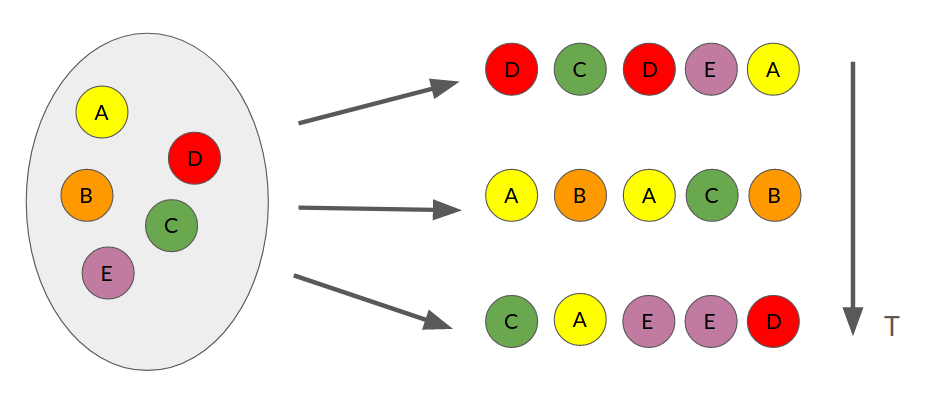

También existe bootstrap basado en los residuos y bootstrap dependiente

### Implementación con Numpy y Scipy

Podemos usar `numpy.random.choice` para remuestrear los datos

En este caso debemos remuestrar las parejas $(x_i, y_i)$

Luego calculamos y guardamos los parámetros para cada remuestreo

In [ ]:
df = pd.read_csv('../data/helados.csv', header=0, index_col=0)
df.columns = ['consumo', 'ingreso', 'precio', 'temperatura']

x, y = df["temperatura"].values, df["consumo"].values
params = scipy.stats.linregress(x, y)

def muestreo_reemplazo(x, y):
    M = len(x)
    idx = np.random.choice(M, size=M, replace=True)
    return x[idx], y[idx]

def boostrap_linregress(x, y, T=100):
    # Parámetros: t0, t1 y r
    params = np.zeros(shape=(T, 3)) 
    for t in range(T):
        res = scipy.stats.linregress(*muestreo_reemplazo(x, y))
        params[t, :] = [res.intercept, res.slope, res.rvalue]
    return params

boostrap_params = boostrap_linregress(x, y, T=1000)

### Resultado en la base de datos de consumo de helados

Veamos la distribución empírica de $r$

En la figura de abajo tenemos
- Histograma azul: Distribución bootstrap de $r$
- Linea roja: $r$ de los datos
- Lineas punteadas negras: Intervalo de confianza empírico al 95%


In [ ]:
r_bootstrap = boostrap_params[:, 2]

fig, ax = plt.subplots(figsize=(4, 3), tight_layout=True)
hist_val, hist_lim, _ = ax.hist(r_bootstrap, bins=20, density=True)

ax.plot([params.rvalue]*2, [0, np.max(hist_val)], 'r-', lw=2)
IC = np.percentile(r_bootstrap, [2.5, 97.5])
ax.plot([IC[0]]*2, [0, np.max(hist_val)], 'k--', lw=2)
ax.plot([IC[1]]*2, [0, np.max(hist_val)], 'k--', lw=2)

display(f"Intervalo de confianza al 95% de r {IC}")

> La distribución y el intervalo de confianza empírico nos hablan de la incerteza de $r$

En este caso notamos que el IC está muy por sobre a 0. Podemos decir con confianza que que la correlación lineal es válida

También podemos decir que es una correlación fuerte ya que es mayor a 0.5 en todo el IC

Reflexione sobre lo siguiente:
- ¿Es la distribución asintotica de $r$ normal? 
- ¿Se podría haber usado un t-test para $r$?

### Visualizando la incerteza del modelo

Usando la distribución empírica de los parámetros $\theta_0$ y $\theta_1$ podemos visualizar la incerteza de nuestro modelo de regresión lineal

En la figura de abajo tenemos
- Puntos azules: Datos
- Linea roja: Modelo de regresión lineal en los datos
- Sombra rojo claro: $\pm 2$ desviaciones estándar del modelo en base a la distribución empírica

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3), tight_layout=True)
ax.scatter(x, y, zorder=100, s=10, label='datos')

def model(theta0, theta1, x):
    return x*theta1 + theta0

ax.plot(x_plot, model(params.intercept, params.slope, x_plot),
        c='r', lw=2, label='mejor ajuste')

dist_lines = model(boostrap_params[:, 0], boostrap_params[:, 1], x_plot.reshape(-1, 1)).T
mean_lines, std_lines = np.mean(dist_lines, axis=0), np.std(dist_lines, axis=0)
ax.fill_between(x_plot, 
                mean_lines - 2*std_lines,
                mean_lines + 2*std_lines, 
                color='r', alpha=0.25, label='incerteza')
plt.legend()


### Recursos adicionales

Más sobre [*bootstrap* y regresión lineal](https://www.stat.cmu.edu/~cshalizi/402/lectures/08-bootstrap/lecture-08.pdf) [aquí](http://homepage.divms.uiowa.edu/~rdecook/stat3200/notes/bootstrap_4pp.pdf) y [acá](https://www.sagepub.com/sites/default/files/upm-binaries/21122_Chapter_21.pdf)